In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import copy
sns.set()
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df = pd.read_csv('top250-00-19.csv')
df.head(4)


,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
df.isna().apply(pd.value_counts)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
False,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,3440,4700.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1260,NaN


In [11]:
# Basic statistics about the data and its variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4700.0,2.433872e+01,3.230809e+00,0.0,22.0,24.0,27.0,35.0
Market_value,3440.0,8.622469e+06,8.795181e+06,50000.0,3500000.0,6000000.0,10000000.0,120000000.0
Transfer_fee,4700.0,9.447586e+06,1.043772e+07,825000.0,4000000.0,6500000.0,10820000.0,222000000.0


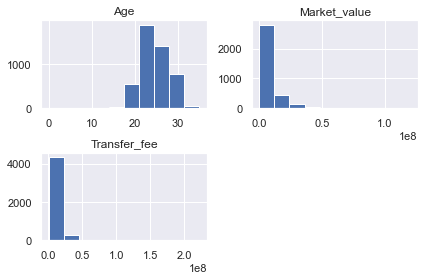

In [12]:
# Histogram
df.hist()
plt.tight_layout()

# Which "position" has been traded the most?¶


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Right Winger'),
  Text(1, 0, 'Centre-Forward'),
  Text(2, 0, 'Left Winger'),
  Text(3, 0, 'Centre-Back'),
  Text(4, 0, 'Central Midfield'),
  Text(5, 0, 'Attacking Midfield'),
  Text(6, 0, 'Defensive Midfield'),
  Text(7, 0, 'Second Striker'),
  Text(8, 0, 'Goalkeeper'),
  Text(9, 0, 'Right-Back'),
  Text(10, 0, 'Left Midfield'),
  Text(11, 0, 'Left-Back'),
  Text(12, 0, 'Right Midfield'),
  Text(13, 0, 'Forward'),
  Text(14, 0, 'Sweeper'),
  Text(15, 0, 'Defender'),
  Text(16, 0, 'Midfielder')])

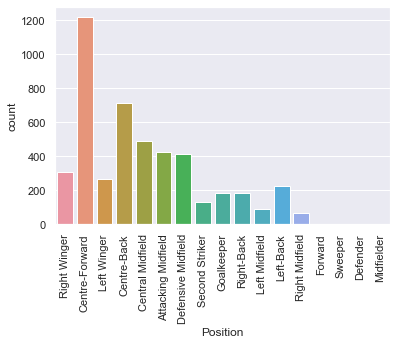

In [13]:
sns.countplot(x='Position',data=df)
plt.xticks(rotation=90)


# Which Season was football trade the most active?


Text(0, 0.5, 'Number of Trade')

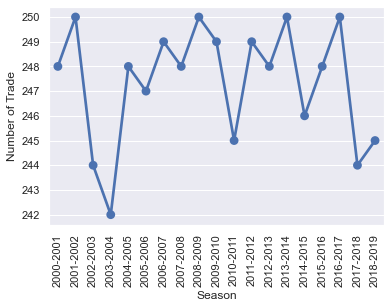

In [15]:
sns.pointplot(x='index',y='Season',data=pd.DataFrame(df.Season.value_counts()).reset_index().sort_values('index'))
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Number of Trade')

# Which league spent the most money buying players for every season? & Which league sold the most players in terms of average transfer fees?

In [16]:
# Order by mean transfer fee from highest to lowest
df.groupby(['League_to']).Transfer_fee.describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
League_to,,,,,,,,
LaLiga,525.0,1.272450e+07,1.463579e+07,950000.0,5000000.0,8000000.0,15000000.0,125000000.0
Premier League,1256.0,1.170016e+07,1.141499e+07,950000.0,4500000.0,8200000.0,14025000.0,105000000.0
Segunda División - Segunda Fase,1.0,1.100000e+07,NaN,11000000.0,11000000.0,11000000.0,11000000.0,11000000.0
Serie A,739.0,1.019651e+07,9.301671e+06,900000.0,4870000.0,7500000.0,12000000.0,117000000.0
Super League,122.0,9.756393e+06,1.007859e+07,1200000.0,4350000.0,7075000.0,10810000.0,60000000.0
...,...,...,...,...,...,...,...,...
Croatia,2.0,1.250000e+06,3.535534e+05,1000000.0,1125000.0,1250000.0,1375000.0,1500000.0
Czech Republic,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
Second Division (bis 03/04),2.0,1.015000e+06,1.626346e+05,900000.0,957500.0,1015000.0,1072500.0,1130000.0


In [17]:
# Order by mean transfer fee from highest to lowest
df.groupby('League_from').Transfer_fee.describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
League_from,,,,,,,,
Rel. Ligue 1,2.0,1.600000e+07,5.656854e+06,12000000.0,14000000.0,16000000.0,18000000.0,20000000.0
LaLiga,418.0,1.323890e+07,1.598130e+07,1400000.0,5000000.0,8200000.0,16000000.0,222000000.0
Liga NOS,178.0,1.253753e+07,1.072555e+07,1000000.0,4000000.0,8300000.0,19750000.0,45000000.0
Premier League,608.0,1.192189e+07,1.337834e+07,1000000.0,4500000.0,7775000.0,14000000.0,125000000.0
Serie A,602.0,1.176741e+07,1.142490e+07,1100000.0,5000000.0,8000000.0,14000000.0,105000000.0
...,...,...,...,...,...,...,...,...
China,4.0,1.702500e+06,1.051360e+06,950000.0,1212500.0,1300000.0,1790000.0,3260000.0
1.Lig,1.0,1.700000e+06,NaN,1700000.0,1700000.0,1700000.0,1700000.0,1700000.0
U19 Eredivisie,2.0,1.500000e+06,7.071068e+05,1000000.0,1250000.0,1500000.0,1750000.0,2000000.0


# Which Teams spent the most money (total sum) in buying players for the past 13 years?

In [20]:
# Top10 Teams that spend the most money in terms of total amount in buying players for the past 13 years
df.groupby("Team_to").Transfer_fee.sum().sort_values(ascending=False).head(10)

Team_to
Chelsea         1820650000
Man City        1800520000
Real Madrid     1680650000
FC Barcelona    1673040000
Man Utd         1497360000
Juventus        1470940000
Liverpool       1412420000
Paris SG        1274780000
Inter           1202690000
Spurs           1024400000
Name: Transfer_fee, dtype: int64

# Correlation amongst variables

<AxesSubplot:>

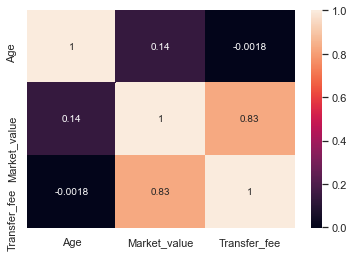

In [21]:
# Correlation Heatmap
sns.heatmap(df.corr(),annot=True)